In [1]:
import matlab.engine
import matplotlib.pyplot as plt
import numpy as np
import json


In [127]:
with open('results/fedavg/n50_s0.1_r1000_e5_loss0.2_modezero_coding.json', 'r') as f:
    result_dict = json.load(f)
with open('results/fedavg/n50_s0.1_r1000_e5_loss0.2_modezero.json', 'r') as f:
    result_dict1 = json.load(f)

print(result_dict)

{'test_acc': [0.34760956175298807, 0.4659362549800797, 0.5215139442231076, 0.5356573705179283, 0.5874501992031872, 0.6723107569721115, 0.6876494023904383, 0.6830677290836653, 0.6884462151394423, 0.6741035856573705, 0.6942231075697212, 0.6792828685258964, 0.6920318725099601, 0.697609561752988, 0.6992031872509961, 0.6884462151394423, 0.702191235059761, 0.7145418326693227, 0.699601593625498, 0.7099601593625497, 0.7017928286852589, 0.7047808764940239, 0.6982071713147411, 0.7081673306772909, 0.6992031872509961, 0.7123505976095618, 0.7137450199203187, 0.7065737051792829, 0.7039840637450199, 0.7189243027888447, 0.7037848605577689, 0.7185258964143426, 0.7266932270916334, 0.7266932270916334, 0.7113545816733068, 0.7161354581673307, 0.7334661354581673, 0.7105577689243028, 0.7284860557768924, 0.7171314741035857, 0.7266932270916334, 0.7245019920318725], 'test_loss': [0.07685063364688682, 0.05189614197108947, 0.047118599155806046, 0.0507982754703886, 0.038668959690591226, 0.03397964265039874, 0.0351

In [128]:
len(result_dict["test_acc"])

42

In [43]:
max_value = max(result_dict['test_acc'])
max_index = result_dict['test_acc'].index(max_value)

print(f'Max value: {max_value}')
print(f'Index of max value: {max_index}')

Max value: 0.7129482071713148
Index of max value: 28


In [113]:
print(f"Average: {np.mean(result_dict1['test_acc'][25:])*100}")
print(f"Std: {np.std(result_dict1['test_acc'][25:])*100}")

Average: 21.95803452855246
Std: 4.427049249893272


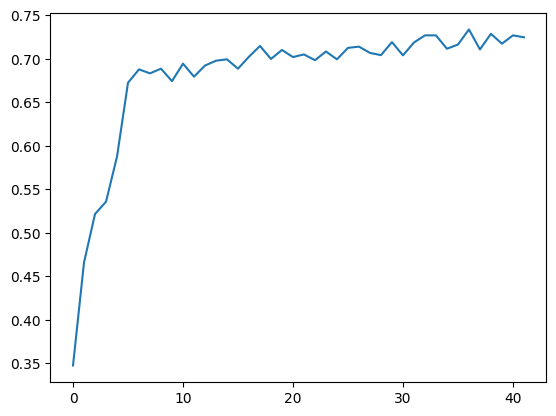

In [125]:
# Plot the accuracy
plt.plot(result_dict['test_acc'])
# plt.plot(result_dict1['test_acc'])

In [ ]:
eng = matlab.engine.start_matlab()

In [56]:
l2e1b10 = np.load('figure_data/l5e1b10.npz')
l2e1b1024 = np.load('figure_data/l5e1b1024.npz')

In [57]:
coding_mse = np.mean(l2e1b10['coding_val_mse'], axis=0)
base_mse = np.mean(l2e1b10['base_val_mse'],axis=0)

# Plot the figure in matlab
average_data1_matlab = matlab.double(coding_mse.tolist())
average_data2_matlab = matlab.double(base_mse.tolist())
x_axis = matlab.double(list(range(1, len(coding_mse) + 1)))

coding_mse = np.mean(l2e1b1024['coding_val_mse'], axis=0)
base_mse = np.mean(l2e1b1024['base_val_mse'],axis=0)

# Plot the figure in matlab
average_data3_matlab = matlab.double(coding_mse.tolist())
average_data4_matlab = matlab.double(base_mse.tolist())

# Plot the data in MATLAB
eng.figure(1.0,nargout=0)
eng.plot(x_axis, average_data1_matlab, 'r-', nargout=0)

eng.hold('on', nargout=0)
eng.plot(x_axis, average_data3_matlab, 'b-', nargout=0)
eng.plot(x_axis, average_data2_matlab, 'g-', nargout=0)
eng.plot(x_axis, average_data4_matlab, 'm-', nargout=0)




eng.hold('off', nargout=0)

font_size = 14
eng.legend(['FedAvg-FERP, B=10', 'FedAvg-FERP, B=1024', 'FedAvg, B=10', 'FedAvg, B=1024'], 'FontSize', 10, nargout=0)
eng.xlabel('Communication Rounds', 'FontSize', font_size)
eng.ylabel('MSE', 'FontSize', font_size)
# eng.title('loss=5%, E=5, B=1024')
eng.grid('on', nargout=0)

# Use drawnow to ensure the figure appears
eng.drawnow(nargout=0)

## Average val mse after 150 round

In [49]:
tmp_data = np.load('figure_data/l2e1b10.npz')
average_coding_mse = np.nanmean(tmp_data['coding_mse'][:,150:1000])
average_coding_val_mse = np.nanmean(tmp_data['coding_val_mse'][:,150:1000])
average_base_mse = np.nanmean(tmp_data['base_mse'][:,150:1000])
average_base_val_mse = np.nanmean(tmp_data['base_val_mse'][:,150:1000])

print(f'coding_mse: {average_coding_mse}')
print(f'coding_val_mse: {average_coding_val_mse}')
print(f'base_mse: {average_base_mse}')
print(f'base_val_mse: {average_base_val_mse}')

coding_mse: 323.1957190614588
coding_val_mse: 447.0334008115881
base_mse: 959.6834428764791
base_val_mse: 944.0132116205552
